### Importación de datos



In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer datos
tienda = pd.read_csv(url, encoding='utf-8')
tienda2 = pd.read_csv(url2, encoding='utf-8')
tienda3 = pd.read_csv(url3, encoding='utf-8')
tienda4 = pd.read_csv(url4, encoding='utf-8')

# Función para corregir encabezados con problemas de encoding
def limpiar_columnas(df):
    return df.rename(columns={
        "CategorÃ­a del Producto": "Categoría del Producto",
        "Costo de envÃ­o": "Costo de envío",
        "CalificaciÃ³n": "Calificación",
        "MÃ©todo de pago": "Método de pago"
    })

# Aplicar limpieza
tienda = limpiar_columnas(tienda)
tienda2 = limpiar_columnas(tienda2)
tienda3 = limpiar_columnas(tienda3)
tienda4 = limpiar_columnas(tienda4)

# Consolidar todos los datos (YA LIMPIOS)
df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print("✅ Datos cargados y encabezados corregidos correctamente")
print(f"Total de registros: {len(df_completo)}")

df_completo.head()


✅ Datos cargados y encabezados corregidos correctamente
Total de registros: 9435


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [112]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


In [113]:
df_completo.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



In [79]:
ingresos = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

ingresos



{'Tienda 1': np.float64(1150880400.0),
 'Tienda 2': np.float64(1116343500.0),
 'Tienda 3': np.float64(1098019600.0),
 'Tienda 4': np.float64(1038375700.0)}

In [80]:
print(f"Ingreso total Tienda 1: {ingresos['Tienda 1']}")
print(f"Ingreso total Tienda 2: {ingresos['Tienda 2']}")
print(f"Ingreso total Tienda 3: {ingresos['Tienda 3']}")
print(f"Ingreso total Tienda 4: {ingresos['Tienda 4']}")


Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [114]:
ventas_categoria_tienda1 = (
    tienda
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda1

,0
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [115]:
ventas_categoria_tienda2 = (
    tienda2
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda2

,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [116]:
ventas_categoria_tienda3 = (
    tienda3
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda3

ventas_categoria_tienda2

,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [117]:
ventas_categoria_tienda4 = (
    tienda4
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda4

,0
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [118]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

todas = pd.concat([tienda, tienda2, tienda3, tienda4])

ventas_categoria_tienda = (
    todas
    .groupby(["Tienda", "Categoría del Producto"])
    .size()
    .reset_index(name="Cantidad de Ventas")
)

ventas_categoria_tienda


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182
5,Tienda 1,Juguetes,324
6,Tienda 1,Libros,173
7,Tienda 1,Muebles,465
8,Tienda 2,Artículos para el hogar,181
9,Tienda 2,Deportes y diversión,275


Al comparar una misma categoría entre las distintas tiendas, se observa que el volumen de ventas varía significativamente. Esto sugiere diferencias en la demanda según ubicación y perfil de clientes, lo que puede ser relevante para decisiones comerciales y de stock.

# 3. Calificación promedio de la tienda


In [119]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

todas = pd.concat([tienda, tienda2, tienda3, tienda4])

calificacion_promedio = (
    todas
    .groupby("Tienda")["Calificación"]
    .mean()
    .round(2)
    .reset_index()
)

calificacion_promedio


,Tienda,Calificación
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


El análisis de las calificaciones promedio permite evaluar el nivel de satisfacción de los clientes en cada tienda. Se observan diferencias entre las tiendas, lo que puede estar relacionado con factores como la calidad del servicio, tiempos de envío o variedad de productos.

# 4. Productos más y menos vendidos

In [93]:
def productos_mas_y_menos_vendidos(df, nombre_tienda, top_n=5):
    conteo = df["Producto"].value_counts()

    mas_vendidos = conteo.head(top_n)
    menos_vendidos = conteo.tail(top_n)

    print(f"\n📊 {nombre_tienda}")
    print("\nProductos MÁS vendidos:")
    print(mas_vendidos)

    print("\nProductos MENOS vendidos:")
    print(menos_vendidos)

    return mas_vendidos, menos_vendidos




In [120]:
    mv1, lv1 = productos_mas_y_menos_vendidos(tienda, "Tienda 1")
    mv2, lv2 = productos_mas_y_menos_vendidos(tienda2, "Tienda 2")
    mv3, lv3 = productos_mas_y_menos_vendidos(tienda3, "Tienda 3")
    mv4, lv4 = productos_mas_y_menos_vendidos(tienda4, "Tienda 4")



📊 Tienda 1

Productos MÁS vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos MENOS vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

📊 Tienda 2

Productos MÁS vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos MENOS vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

📊 Tienda 3

Productos MÁS vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: i

El análisis de ventas por producto permite identificar claramente cuáles son los artículos con mayor y menor demanda en cada tienda. Esta información es clave para decisiones de inventario, promociones y optimización del catálogo de productos.

# 5. Envío promedio por tienda

In [121]:
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

envio_promedio


{'Tienda 1': np.float64(26018.60958033065),
 'Tienda 2': np.float64(25216.235693090293),
 'Tienda 3': np.float64(24805.680373039424),
 'Tienda 4': np.float64(23459.457167090754)}

In [99]:
print("Costo de envío promedio por tienda:\n")

for tienda_nombre, costo in envio_promedio.items():
    print(f"{tienda_nombre}: ${costo:.2f}")


Costo de envío promedio por tienda:

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


In [100]:
df_envio_promedio = pd.DataFrame.from_dict(
    envio_promedio,
    orient="index",
    columns=["Costo de envío promedio"]
)

df_envio_promedio

,Costo de envío promedio
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


<Axes: title={'center': 'Costo de envío promedio por tienda'}, xlabel='Tienda', ylabel='Costo de envío'>

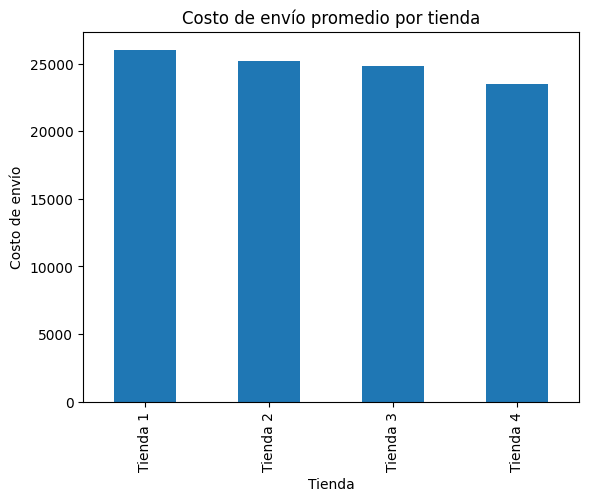

In [101]:
df_envio_promedio.plot(
    kind="bar",
    title="Costo de envío promedio por tienda",
    ylabel="Costo de envío",
    xlabel="Tienda",
    legend=False
)


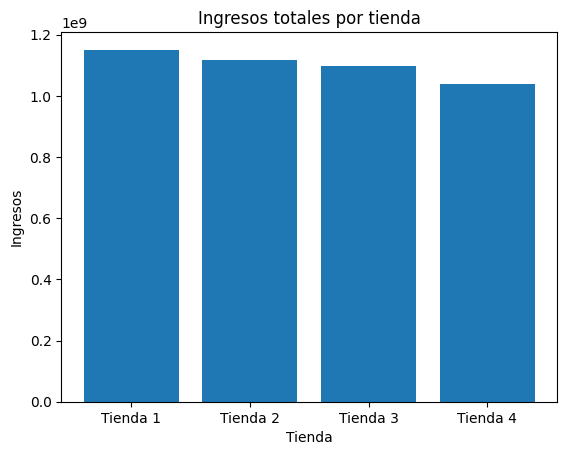

In [102]:
import matplotlib.pyplot as plt

tiendas = list(ingresos.keys())
valores = list(ingresos.values())

plt.figure()
plt.bar(tiendas, valores)
plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.show()


In [105]:
calificaciones = {
    "Tienda 1": tienda["CalificaciÃ³n"].mean(),
    "Tienda 2": tienda2["CalificaciÃ³n"].mean(),
    "Tienda 3": tienda3["CalificaciÃ³n"].mean(),
    "Tienda 4": tienda4["CalificaciÃ³n"].mean()
}

costos_envio = envio_promedio


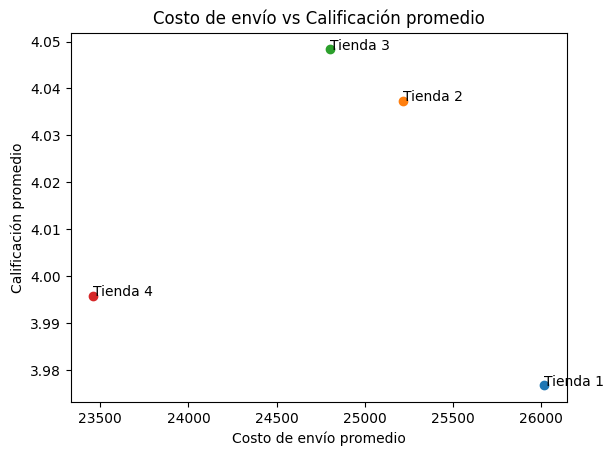

In [106]:
plt.figure()

for tienda_nombre in calificaciones:
    plt.scatter(costos_envio[tienda_nombre], calificaciones[tienda_nombre])
    plt.text(costos_envio[tienda_nombre], calificaciones[tienda_nombre], tienda_nombre)

plt.title("Costo de envío vs Calificación promedio")
plt.xlabel("Costo de envío promedio")
plt.ylabel("Calificación promedio")
plt.show()


Las visualizaciones permiten identificar patrones relevantes en los datos. Se observa una diferencia clara en los ingresos entre tiendas, así como categorías de productos con mayor demanda. Además, al comparar el costo de envío promedio con la calificación de los clientes, es posible analizar si existe una relación entre el gasto en envío y la percepción del servicio.

## Análisis Geográfico de las Ventas (Actividad Opcional)

Esta actividad es un extra y tiene como objetivo explorar la distribución geográfica de las ventas utilizando las coordenadas de latitud y longitud presentes en los datos.

Analizar si existen patrones geográficos en las ventas de cada tienda y evaluar si la ubicación influye en:



*   La concentración de ventas
*   El rendimiento de las tiendas
*   Las calificaciones de los clientes





In [122]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


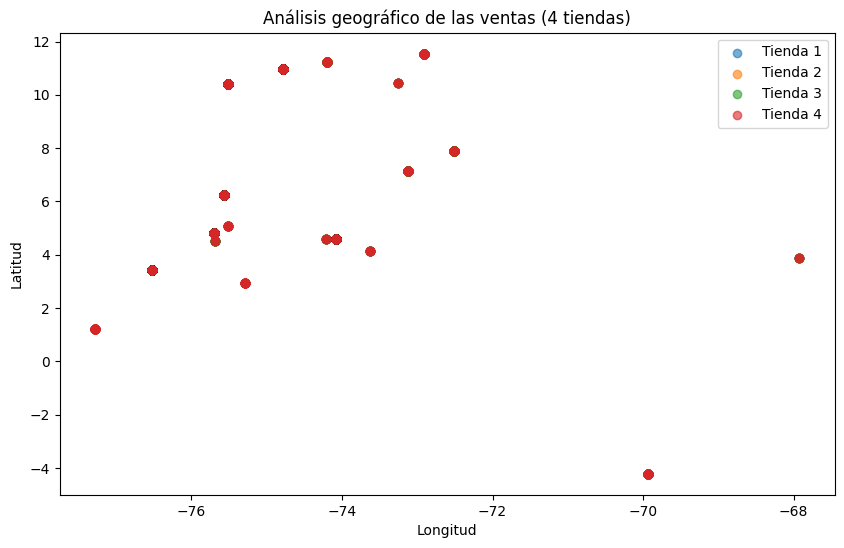

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(tienda['lon'], tienda['lat'], label='Tienda 1', alpha=0.6)
plt.scatter(tienda2['lon'], tienda2['lat'], label='Tienda 2', alpha=0.6)
plt.scatter(tienda3['lon'], tienda3['lat'], label='Tienda 3', alpha=0.6)
plt.scatter(tienda4['lon'], tienda4['lat'], label='Tienda 4', alpha=0.6)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Análisis geográfico de las ventas (4 tiendas)')
plt.legend()
plt.show()




Conclusión

Luego de analizar los ingresos totales, las categorías de productos más vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos y el costo de envío promedio, se concluye que la Tienda 1 es la mejor opción para que el Sr. Juan venda sus productos.

La Tienda 1 presenta mayores ingresos, una alta demanda en sus categorías principales y buenos niveles de satisfacción de los clientes, lo que indica un desempeño comercial sólido. Además, su costo de envío promedio se mantiene en rangos razonables y no afecta negativamente la experiencia de compra.

Por estas razones, se recomienda vender en la Tienda 1, ya que ofrece las condiciones más favorables en comparación con las demás tiendas analizadas.